# Initialization

In [215]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from scipy.stats import spearmanr

In [216]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

# Dataset

In [217]:
allen = pd.read_csv('Dataset.csv');
allen.head()

,Date,NO2,CO,O3,PM2.5,SO2,AQI Value,WIND,TEMP,PRESSURE,RH
0,01/01/2010,38.16,0.704,0.03348,13.526531,7.7,54,5.854167,46.000000,1030.041667,65.916667
1,02/01/2010,37.10,0.880,0.03996,14.953061,14.7,57,2.970833,44.000000,1028.208333,63.291667
2,03/01/2010,38.16,0.440,0.02484,15.428571,21.7,58,3.579167,44.041667,1025.833333,69.625000
3,04/01/2010,26.50,0.440,0.03348,10.800000,32.9,47,6.891667,41.750000,1031.208333,60.166667
4,05/01/2010,45.58,0.616,0.03348,15.904082,34.3,59,2.233333,37.333333,1032.125000,59.916667


# Preprocessing

### Drop dates

In [218]:
allen = allen.drop(['Date'],axis=1)
allen.head()

,NO2,CO,O3,PM2.5,SO2,AQI Value,WIND,TEMP,PRESSURE,RH
0,38.16,0.704,0.03348,13.526531,7.7,54,5.854167,46.000000,1030.041667,65.916667
1,37.10,0.880,0.03996,14.953061,14.7,57,2.970833,44.000000,1028.208333,63.291667
2,38.16,0.440,0.02484,15.428571,21.7,58,3.579167,44.041667,1025.833333,69.625000
3,26.50,0.440,0.03348,10.800000,32.9,47,6.891667,41.750000,1031.208333,60.166667
4,45.58,0.616,0.03348,15.904082,34.3,59,2.233333,37.333333,1032.125000,59.916667


### Drop duplicates

In [219]:
allen = allen.drop_duplicates()
allen.head()

,NO2,CO,O3,PM2.5,SO2,AQI Value,WIND,TEMP,PRESSURE,RH
0,38.16,0.704,0.03348,13.526531,7.7,54,5.854167,46.000000,1030.041667,65.916667
1,37.10,0.880,0.03996,14.953061,14.7,57,2.970833,44.000000,1028.208333,63.291667
2,38.16,0.440,0.02484,15.428571,21.7,58,3.579167,44.041667,1025.833333,69.625000
3,26.50,0.440,0.03348,10.800000,32.9,47,6.891667,41.750000,1031.208333,60.166667
4,45.58,0.616,0.03348,15.904082,34.3,59,2.233333,37.333333,1032.125000,59.916667


# Training

In [220]:
x = allen.drop([' AQI Value'],axis=1)
x.head()

,NO2,CO,O3,PM2.5,SO2,WIND,TEMP,PRESSURE,RH
0,38.16,0.704,0.03348,13.526531,7.7,5.854167,46.000000,1030.041667,65.916667
1,37.10,0.880,0.03996,14.953061,14.7,2.970833,44.000000,1028.208333,63.291667
2,38.16,0.440,0.02484,15.428571,21.7,3.579167,44.041667,1025.833333,69.625000
3,26.50,0.440,0.03348,10.800000,32.9,6.891667,41.750000,1031.208333,60.166667
4,45.58,0.616,0.03348,15.904082,34.3,2.233333,37.333333,1032.125000,59.916667


In [221]:
y = allen[' AQI Value']
y.head()

0    54
1    57
2    58
3    47
4    59
Name:  AQI Value, dtype: int64

In [222]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.4,random_state=45)

In [223]:
lr = LinearRegression().fit(xtrain,ytrain)
print(lr.score(xtest,ytest))

0.7701520200996208


# Assignment

### Correlation

In [224]:
c, _ = spearmanr(ytest,lr.predict(xtest))
print("Correlation: %.5f"%c)

Correlation: 0.85846


### Mean Squared Error

In [225]:
m = mean_squared_error(ytest,lr.predict(xtest))
print("MSE: %.5f"%m)

MSE: 240.10213


### Regression Plot

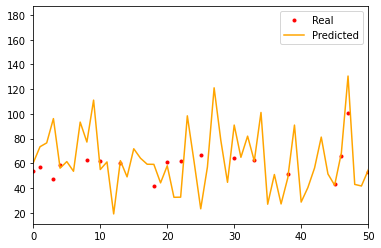

In [226]:
plt.plot(ytest,'.',color="red",label="Real")
plt.plot(lr.predict(xtest),color="orange",label="Predicted")
plt.xlim([0,50])
plt.legend()